In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('dataset_heart.csv')

In [7]:
df.head(3)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2


In [8]:
x=df.drop(columns='heart disease')
y=df['heart disease']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
model=LogisticRegression()
model.fit(x_train, y_train)

C:\Users\PMYLS\Music\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = model.predict(x_test)
y_test_binary = y_test.replace(2, 0)

In [12]:
y_test_binary

30     0
116    0
79     1
127    1
196    1
      ..
55     1
97     0
200    1
38     1
154    1
Name: heart disease, Length: 81, dtype: int64

In [13]:
y_pred_proba = model.predict_proba(x_test)[:, 1]
y_pred_proba

array([0.60429343, 0.43527822, 0.04738827, 0.04678304, 0.07978923,
       0.66025298, 0.69408637, 0.04737006, 0.21159615, 0.0626152 ,
       0.08212118, 0.45366851, 0.8271313 , 0.77328738, 0.31502187,
       0.23154382, 0.44669475, 0.20069755, 0.84996995, 0.28107096,
       0.92796482, 0.12635101, 0.50655218, 0.20232139, 0.46541122,
       0.99383149, 0.37585257, 0.87026307, 0.01179725, 0.06467977,
       0.02244   , 0.106735  , 0.636579  , 0.0977114 , 0.27474546,
       0.68575793, 0.94209653, 0.07903675, 0.88883117, 0.106332  ,
       0.03273393, 0.08779615, 0.20801535, 0.31271981, 0.01123773,
       0.02863926, 0.09657433, 0.79699959, 0.49527832, 0.45763326,
       0.07397034, 0.01928422, 0.12328813, 0.76309136, 0.03138297,
       0.99028053, 0.45728011, 0.69141792, 0.06188309, 0.04178   ,
       0.98696583, 0.98803771, 0.91120759, 0.5744604 , 0.7795316 ,
       0.35806148, 0.04750273, 0.16122439, 0.22699598, 0.06483314,
       0.12639827, 0.23572946, 0.06058019, 0.10565708, 0.09174

# Confusion matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)

In [15]:
print(cm)

[[46  3]
 [11 21]]


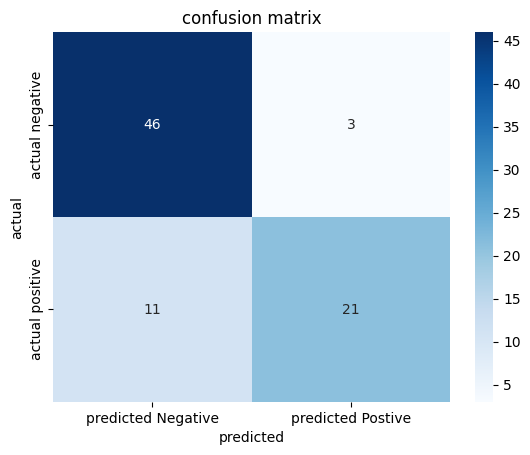

In [16]:
sns.heatmap(cm,annot=True,fmt="d", cmap="Blues",xticklabels=['predicted Negative','predicted Postive'],yticklabels=['actual negative','actual positive'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

# accuracy

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8271604938271605

# precision

In [18]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
precision

0.8070175438596491

# Recall

In [19]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.9387755102040817

# f1 score

In [20]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

0.8679245283018868

# ROC Curve

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)


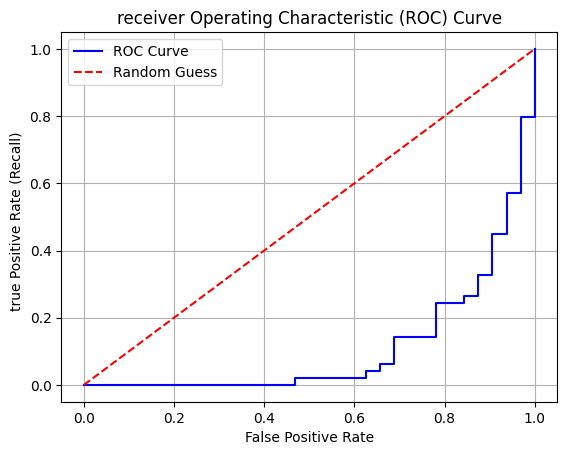

In [32]:
plt.plot(fpr, tpr,color='blue',label='ROC Curve')
plt.plot([0,1] ,[0,1],color='red',linestyle='--',label='Random Guess')
plt.xlabel( 'False Positive Rate')
plt.ylabel('true Positive Rate (Recall)  ')
plt.title( 'receiver Operating Characteristic (ROC) Curve')

plt.legend()
plt.grid(True)

plt.show()

# AUC (Area Under the Curve)

In [23]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test_binary, y_pred_proba)
auc

0.11033163265306123

# Cross-Validation

In [33]:
from sklearn.model_selection import cross_val_score
cv_scores= cross_val_score(model,x,  y,  cv=5)
print(f"Average cross-validation accuracy:{np.mean(cv_scores):.4f}")


Average cross-validation accuracy:0.8444


C:\Users\PMYLS\Music\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PMYLS\Music\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

# Classification Report

In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.81      0.94      0.87        49
           2       0.88      0.66      0.75        32

    accuracy                           0.83        81
   macro avg       0.84      0.80      0.81        81
weighted avg       0.83      0.83      0.82        81

